In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv('../data/jobs_3.csv')

In [139]:
df.head()

,country,title,text,job_title
0,AT,Inform,Information Technology Security Manager Global...,Information Technology Security Manager
1,AT,Architect,Information Security Architect Copmany SWAROVS...,Information Security Architect
2,AT,Manager,Information Technology Security Manager Copman...,Information Technology Security Manager
3,AT,Analyst,Threat Detection Analyst Company Radar Cyber S...,Threat Detection Analyst
4,AT,Engineer,IT Security Engineer Company Global Blue Locat...,IT Security Engineer


In [140]:
import nltk
from textblob import TextBlob
from textblob import Word
nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_text(text):
    return text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
def tokenize_text(text):
    return text.apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elsha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [141]:
df['text'] = lemmatize_text(df['text'])
df['text'] = tokenize_text(df['text'])

In [142]:
df['text']

0      [Information, Technology, Security, Manager, G...
1      [Information, Security, Architect, Copmany, SW...
2      [Information, Technology, Security, Manager, C...
3      [Threat, Detection, Analyst, Company, Radar, C...
4      [IT, Security, Engineer, Company, Global, Blue...
                             ...                        
264    [Compensa, Vienna, Insurance, Group, ADB, Latv...
265    [Netcracker, office, in, Riga, is, an, integra...
266    [Overview, ONE, IDENTITY-, Software, Sales, Ac...
267    [The, opportunityAt, Worldline, ,, our, techno...
268    [OpenStack, ,, while, complex, and, challengin...
Name: text, Length: 269, dtype: object

In [143]:
certificates = ['CISSP', 'CISA', 'CISM', 'Security+', 'CEH', 'GSEC', 'SSCP', 'CASP+', 'GCIH', 'OSCP', 'CISCO', 'ISO']

cert = pd.DataFrame( list(zip(certificates, np.zeros(len(certificates)) )), columns=['Certificate', 'Amount'] )

print(cert)

   Certificate  Amount
0        CISSP     0.0
1         CISA     0.0
2         CISM     0.0
3    Security+     0.0
4          CEH     0.0
5         GSEC     0.0
6         SSCP     0.0
7        CASP+     0.0
8         GCIH     0.0
9         OSCP     0.0
10       CISCO     0.0
11         ISO     0.0


In [144]:
def sum_of_certificates(text):
    c = 0
    for ind, i in text.items():
        for j in range(len(cert['Certificate'])):
            if cert.iloc[j]['Certificate'] in i:
                cert['Amount'].loc[j] += 1
                c+=1
    return cert

In [145]:
cert = sum_of_certificates( df['text'] )

C:\Users\elsha\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [146]:
cert

,Certificate,Amount
0,CISSP,35.0
1,CISA,14.0
2,CISM,14.0
3,Security+,0.0
4,CEH,18.0
5,GSEC,2.0
6,SSCP,1.0
7,CASP+,0.0
8,GCIH,1.0
9,OSCP,9.0


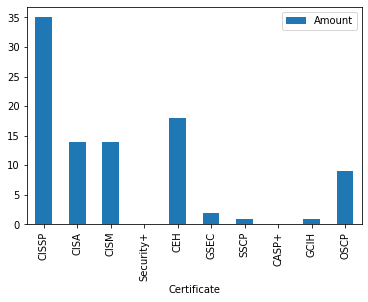

In [62]:
cert.plot.bar(x='Certificate', y='Amount')
plt.savefig('../figures/certificates_result.png')

In [39]:
programming = ['Java', 'Python', 'SQL', 'C', 'C++', 'JavaScript', 'Ruby', 'PHP', 'PowerShell']

prog = pd.DataFrame( list(zip(programming, np.zeros(len(programming)) )), columns=['Language', 'Amount'] )

print(prog)

     Language  Amount
0        Java     0.0
1      Python     0.0
2         SQL     0.0
3           C     0.0
4         C++     0.0
5  JavaScript     0.0
6        Ruby     0.0
7         PHP     0.0
8  PowerShell     0.0


In [40]:
def sum_of_programming(text):
    c = 0
    for ind, i in text.items():
        for j in range(len(prog['Language'])):
            if prog.iloc[j]['Language'] in i:
                prog['Amount'].loc[j] += 1
                c+=1
    return prog

In [41]:
prog = sum_of_programming( df['text'] )

C:\Users\elsha\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [42]:
prog

,Language,Amount
0,Java,13.0
1,Python,35.0
2,SQL,21.0
3,C,14.0
4,C++,1.0
5,JavaScript,12.0
6,Ruby,6.0
7,PHP,5.0
8,PowerShell,6.0


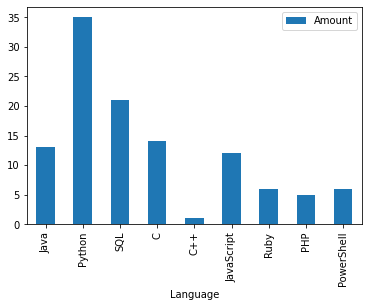

In [44]:
prog.plot.bar(x='Language', y='Amount')
plt.savefig('../figures/prog_lang_stat.png')

In [85]:
soft_skills = ['Adaptability', 'Communication', 'Passion', 'Leadership',
               'Business acumen', 'Curiousity', 'Networking', 'Research', 'Verbal']

soft = pd.DataFrame( list(zip(soft_skills, np.zeros(len(soft_skills)) )), columns=['Skill', 'Amount'] )

print(soft)

             Skill  Amount
0     Adaptability     0.0
1    Communication     0.0
2          Passion     0.0
3       Leadership     0.0
4  Business acumen     0.0
5       Curiousity     0.0
6       Networking     0.0
7         Research     0.0
8           Verbal     0.0


In [86]:
def sum_of_soft_skills(text):
    c = 0
    for ind, i in text.items():
        for j in range(len(soft['Skill'])):
            if soft.iloc[j]['Skill'] in i:
                soft['Amount'].loc[j] += 1
                c+=1
    return soft

In [87]:
soft = sum_of_soft_skills( df['text'] )
soft

C:\Users\elsha\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Skill,Amount
0,Adaptability,0.0
1,Communication,6.0
2,Passion,4.0
3,Leadership,3.0
4,Business acumen,0.0
5,Curiousity,0.0
6,Networking,8.0
7,Research,20.0
8,Verbal,2.0


In [134]:
industries = ['Information', 'Telecommunications', 'Accounting', 'Energy',
              'Marketing', 'Advertising', 'Automotive', 'Banking']

inds = pd.DataFrame( list(zip(industries, np.zeros(len(industries)) )), columns=['Industry', 'Amount'] )

print(inds)

             Industry  Amount
0         Information     0.0
1  Telecommunications     0.0
2          Accounting     0.0
3              Energy     0.0
4           Marketing     0.0
5         Advertising     0.0
6          Automotive     0.0
7             Banking     0.0


In [135]:
def sum_of_industries(text):
    c = 0
    for ind, i in text.items():
        for j in range(len(industries)):
            if inds.iloc[j]['Industry'] in i:
                inds['Amount'].loc[j] += 1
                c+=1
    return inds

In [136]:
inds = sum_of_industries( df['text'] )
inds

C:\Users\elsha\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Industry,Amount
0,Information,98.0
1,Telecommunications,4.0
2,Accounting,1.0
3,Energy,3.0
4,Marketing,12.0
5,Advertising,4.0
6,Automotive,3.0
7,Banking,12.0
